In [ ]:
import kagglehub

path = kagglehub.dataset_download("yasserh/bmidataset")

print("Path to dataset files:", path)

100%|██████████| 2.19k/2.19k [00:00<00:00, 3.68MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/bmidataset/versions/1


In [2]:
import os
os.listdir(path)


['bmi.csv']

In [3]:
import pandas as pd

df = pd.read_csv(path + "/bmi.csv")
print(df.head())


   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
X = df[['Height', 'Weight']]
y = df['Index']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
print(model.coef_)      # m
print(model.intercept_) # c


[-0.03595564  0.03455358]
6.198240775828793


In [8]:
y_pred = model.predict(X_test)
print(y_pred)

[3.96840077 2.31774327 3.22454875 3.32119916 4.13225825 6.05423416
 4.70474444 5.66573239 3.13490865 5.79833845 3.68075561 4.37653144
 1.86013434 4.40778286 4.7299816  2.83374088 6.09159187 4.87801037
 2.85938404 5.19880704 2.3401763  6.02809297 1.50478409 3.6872679
 3.85913177 5.29405539 5.82778181 6.23261032 4.28919744 2.48820507
 4.14487683 5.48034591 4.02208522 3.67745345 3.34734036 2.15619189
 4.82522995 2.45925975 3.19189526 2.23461547 4.80279692 1.94186008
 3.81336167 3.02984584 4.97185666 3.26751471 3.25910233 3.24557971
 3.50798771 3.47343413 3.89278131 3.72512364 1.89328586 1.69718089
 5.82637974 2.54980388 2.57314095 6.03089709 6.51324515 4.08558412
 4.11923367 5.32300072 4.31203648 3.88577099 1.4525017  2.34528653
 3.12369213 3.65411639 2.18794134 2.14497537 2.20757024 4.12714802
 2.13095473 3.14612516 5.75727258 4.94291133 5.27162237 3.92213264
 2.53067301 4.90555363 4.46056328 2.99479424 2.40507727 5.41123875
 3.52571652 5.1193874  2.9303913  4.11222334 4.37553538 2.60538

In [9]:

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.3362022483992543
RMSE: 0.5798294994213853


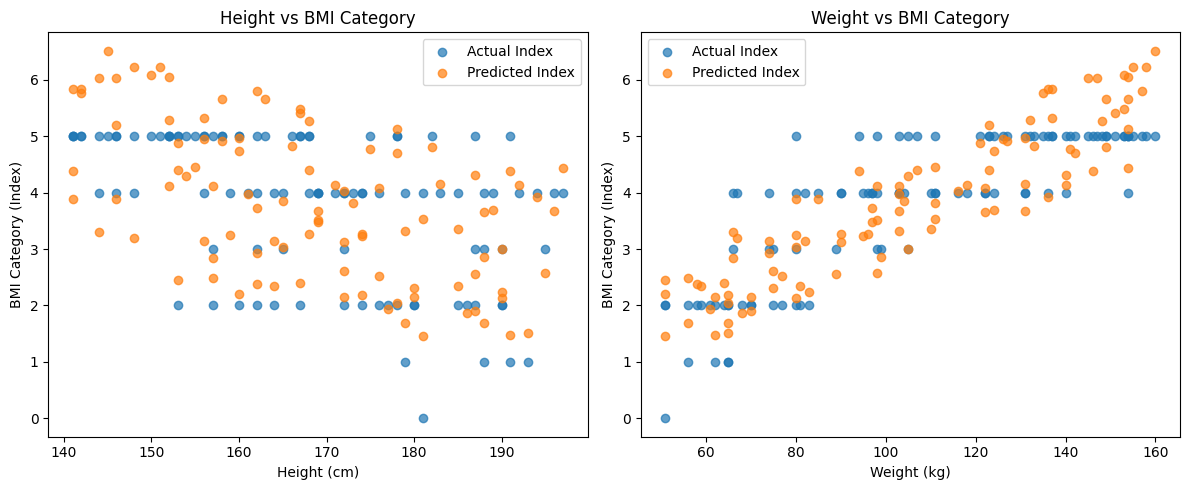

In [10]:
import matplotlib.pyplot as plt

# Extract single columns
height_test = X_test['Height']
weight_test = X_test['Weight']

plt.figure(figsize=(12, 5))

#  Subplot 1
plt.subplot(1, 2, 1)
plt.scatter(height_test, y_test, label="Actual Index", alpha=0.7)
plt.scatter(height_test, y_pred, label="Predicted Index", alpha=0.7)
plt.xlabel("Height (cm)")
plt.ylabel("BMI Category (Index)")
plt.title("Height vs BMI Category")
plt.legend()

#Subplot 2
plt.subplot(1, 2, 2)
plt.scatter(weight_test, y_test, label="Actual Index", alpha=0.7)
plt.scatter(weight_test, y_pred, label="Predicted Index", alpha=0.7)
plt.xlabel("Weight (kg)")
plt.ylabel("BMI Category (Index)")
plt.title("Weight vs BMI Category")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

results = pd.DataFrame({
    'Height(cm)': X_test['Height'],
    'Weight(kg)': X_test['Weight'],
    'ActualIndex': y_test,
    'PredictedIndex': y_pred
})

results.head(5)



,Height(cm),Weight(kg),ActualIndex,PredictedIndex
361,161,103,4,3.968401
73,180,75,2,2.317743
374,174,95,4,3.224549
155,179,103,4,3.321199
104,192,140,4,4.132258


In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.7981858164360079
